In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import torch
import gpytorch
import matplotlib.pyplot as plt
import xarray as xr
import tqdm
import utils as utils
import cartopy.crs as ccrs

base_dir = os.path.join(os.getcwd(), '..')
sys.path.append(base_dir)

import src.evaluation.visualisation as vis

<IPython.core.display.Javascript object>

In [3]:
groundtruth =  xr.open_dataarray('./netcdf/hist_aer_NorESM2_LM.nc')
pattern_scaling =  xr.open_dataarray('./netcdf/hist_aer_pattern_scaling.nc')
plain_gp =  xr.open_dataarray('./netcdf/hist_aer_plain_gp.nc')
fairgp =  xr.open_dataarray('./netcdf/hist_aer_fairgp.nc')

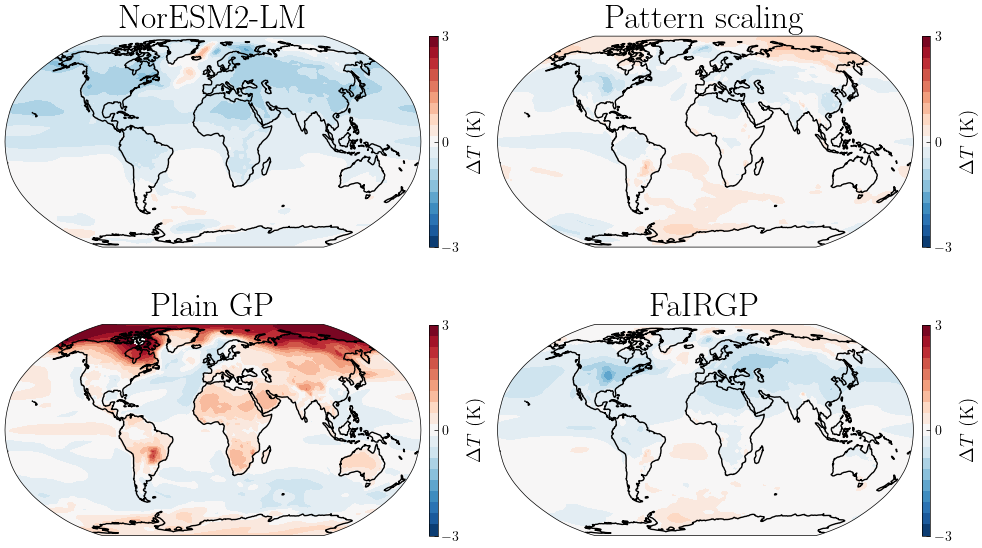

In [19]:
start, end = 1900, 2014
time_slice = slice(start, end)

vmax = 3
ticks = [-vmax, 0, vmax]

fig, ax = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={'projection': ccrs.Robinson()})


_, __, cbar = vis.plot_contourf_on_ax(groundtruth.sel(time=time_slice).mean(dim='time'),
                        fig, ax[0, 0], colorbar=True, vmax=vmax)
cbar.set_ticks(ticks)

_, __, cbar = vis.plot_contourf_on_ax(pattern_scaling.sel(time=time_slice).mean(dim='time'),
                        fig, ax[0, 1], colorbar=True, vmax=vmax)
cbar.set_ticks(ticks)

_, __, cbar = vis.plot_contourf_on_ax(plain_gp.sel(time=time_slice).mean(dim='time'),
                        fig, ax[1, 0], colorbar=True, vmax=vmax)
cbar.set_ticks(ticks)

_, __, cbar = vis.plot_contourf_on_ax(fairgp.sel(time=time_slice).mean(dim='time'),
                        fig, ax[1, 1], colorbar=True, vmax=vmax)
cbar.set_ticks(ticks)

ax[0, 0].set_title("NorESM2-LM", fontsize=24)
ax[0, 1].set_title("Pattern scaling", fontsize=24)
ax[1, 0].set_title("Plain GP", fontsize=24)
ax[1, 1].set_title("FaIRGP", fontsize=24)

plt.tight_layout()
plt.savefig('./figures/hist-aer-spatial-prediction-paper-plot.jpg', dpi=200)
plt.show()

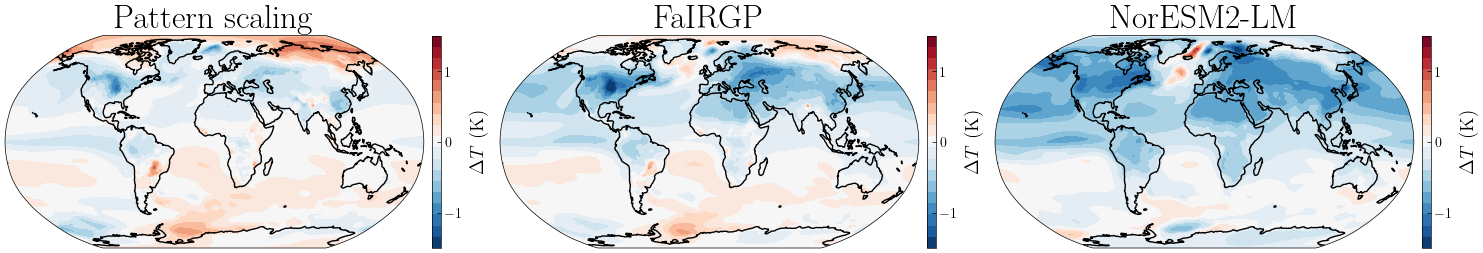

In [40]:
start, end = 1900, 2014
time_slice = slice(start, end)

vmax = 1.5
ticks = [-1, 0, 1]

fig, ax = plt.subplots(1, 3, figsize=(15, 4), subplot_kw={'projection': ccrs.Robinson()})


_, __, cbar = vis.plot_contourf_on_ax(pattern_scaling.sel(time=time_slice).mean(dim='time'),
                        fig, ax[0], colorbar=True, vmax=vmax, levels=20)
cbar.set_ticks(ticks)

_, __, cbar = vis.plot_contourf_on_ax(fairgp.sel(time=time_slice).mean(dim='time').clip(min=-1.5),
                        fig, ax[1], colorbar=True, vmax=vmax, levels=20)
cbar.set_ticks(ticks)

_, __, cbar = vis.plot_contourf_on_ax(groundtruth.sel(time=time_slice).mean(dim='time'),
                        fig, ax[2], colorbar=True, vmax=vmax, levels=20)
cbar.set_ticks(ticks)

ax[0].set_title("Pattern scaling", fontsize=24)
ax[1].set_title("FaIRGP", fontsize=24)
ax[2].set_title("NorESM2-LM", fontsize=24)

plt.tight_layout()
# plt.savefig('./figures/hist-aer-spatial-prediction-paper-plot-without-plaingp.jpg', dpi=200)
plt.show()